No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018706155160>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018706C51970>, -0.0] aaaaaaaaaaaa
No vertex was added!
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018705D51820>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018705D7B070>, -0.0] aaaaaaaaaaaa
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018704412460>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018704412460>, -0.0] aaaaaaaaaaaa
No vertex was added!
[<vertex.VertexDescendant object at 0x00000187058A2700>, -0.0] aaaaaaaaaaaa
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018708E46FA0>, -0.0] aaaaaaaaaaaa
[<vertex.Verte

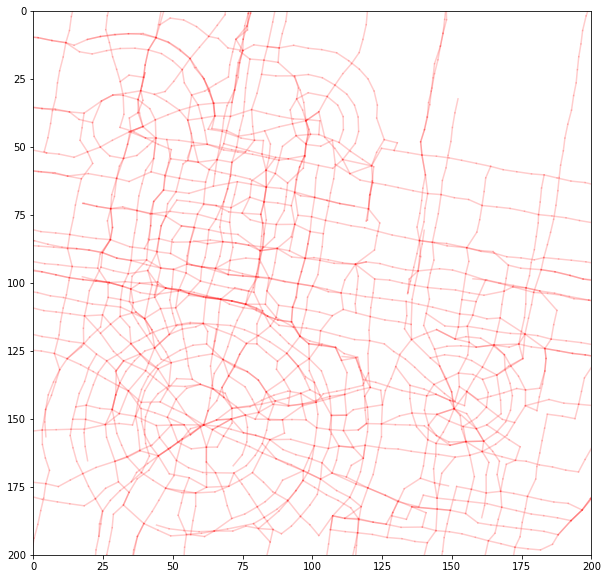

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
import random
import bisect
import copy
from scipy.spatial import Voronoi, voronoi_plot_2d
from itertools import accumulate
import networkx as nx
from randomScatter import RandomScatter
from direction import Direction
from vertex import VertexBase, VertexOrigin, VertexLayer

import ast

random.seed(0)
np.random.seed(0)

"""
We randomly give each center v a population p_v in the population_range.
If w is a node with unit distance d to v, its population is increased
by p_v / 2^d, for d <= 2 (parameters can be adjusted at the top).
The demand on any o-d-pair (o, d) is then given by p_o * p_d.
"""

if __name__ =="__main__":

    ERROR_MESSAGE = '----------------------'
    IMAGE_INPUT_PATH = './image_input/scatter_rate.jpg'
    IMAGE_OUTPUT_PATH = './image_output/'
    ROADMAP_RECTANGLE = ['./image_input/roadMapRectangle_00.jpg']
    ROADMAP_CIRCLE = ['./image_input/roadMapCircle_00.jpg',
                        './image_input/roadMapCircle_01.jpg',
                        './image_input/roadMapCircle_02.jpg',
                        './image_input/roadMapCircle_03.jpg']

    if not os.path.exists(IMAGE_OUTPUT_PATH):
        os.mkdir(IMAGE_OUTPUT_PATH)

    randomScatterInstance = RandomScatter(IMAGE_INPUT_PATH, 200, 0, reverse=True, squared=True)
    randomScatterInstance.readImage()
    randomScatterInstance.randomDots()
    randomScatterInstance.makePoints()

    #run improvePoints twice to refine points' locations
    randomScatterInstance.improvePoints(randomScatterInstance.points)
    randomScatterInstance.improvePoints(randomScatterInstance.improvedPoints) * 1#_, graph = 

    directionInstance = Direction(ROADMAP_RECTANGLE, ROADMAP_CIRCLE)

    vertexLayertInstance = VertexLayer(randomScatterInstance, directionInstance)
    
#     figs = voronoi_plot_2d(vor)
    
#     plt.ion()
#     plt.ioff()
#     plt.show()
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xlim(left=0, right=randomScatterInstance.shape[1])
    ax.set_ylim(top=0, bottom=randomScatterInstance.shape[0])

    
    for i in range(20):
        vertexLayertInstance.getNextVertices()
        vertexLayertInstance.mergeNextVertices(5)
        vertexLayertInstance.mergeToAll(3)
        vertexLayertInstance.plotLines(vertexLayertInstance.verticesNext, True)
        if len(vertexLayertInstance.verticesNext)<=3:
            break
        vertexLayertInstance.changeNextVertices()

#     pos = nx.get_node_attributes(graph, 'pos')
#     nx.draw_networkx_nodes(graph, pos=pos, node_size=6, node_color='k')
#     nx.draw_networkx_edges(graph, pos=pos, width=2)

#     plt.axis('off')
#     plt.show()
#     print(vertexLayertInstance.verticesAll)   # What do the coordinates mean?

    # vertexLayertInstance.plotLines(vertexLayertInstance.verticesAll+vertexLayertInstance.verticesOrigin)

#     stops = []
#     nbr = []
#     for node in vertexLayertInstance.verticesAll:
#         nbrs = []
#         if node.goesTo:
#             nbrs = [i[0] for i in node.goesTo]
#         if any(node.comesFrom):
#             nbrs.extend([i[0] for i in node.comesFrom])
#         if len(nbrs) >= 5:
#             stops.append(node)
#             nbr = nbrs
#         elif len(nbrs) < 5:
#             if random.uniform(0, 1) < 0.2:
#                 stops.append(node)
# #         print(len(nbrs))
#     vertexLayertInstance.plotVertices(stops, 0.2, '#0000ff')
#     vertexLayertInstance.plotVertices(nbr, 0.2, '#00ff00')

#     for ver in vertexLayertInstance.verticesOrigin:
#         ver.dem += 0.3
#     vertexLayertInstance.plotVertices(vertexLayertInstance.verticesOrigin, 0.2, '#0000ff')
#     for path in path_list:
#         x_coor = []
#         y_coor = []
#         for ver in path:
#             x_coor.append(ver.position[1])
#             y_coor.append(ver.position[0])
# #         print(x_coor, y_coor)
#         plt.plot(x_coor, y_coor, marker = "o")
    plt.savefig(IMAGE_OUTPUT_PATH+'output.png')
    plt.show()


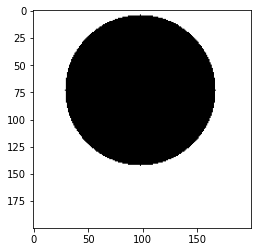

In [8]:
import cv2
import numpy as np
    
 
# Reading an image in default mode
Img = np.zeros((200, 200), np.uint8)
radius = random.randint(25, 75)
center_coordinates = [random.randint(0+radius, 100), random.randint(0+radius, 100)]
# center_coordinates.append([random.randint(100, 200), random.randint(0, 100)])
# center_coordinates.append([random.randint(0, 100), random.randint(100, 200)])
# center_coordinates.append([random.randint(100, 200), random.randint(100, 200)])

# Radius of circle
# radius.append(random.randint(25, 50))
# radius.append(random.randint(25, 50))
# radius.append(random.randint(25, 50))
# radius.append(random.randint(25, 50))

# # Red color in BGR
color = 255
   
# Line thickness of -1 px
thickness = -1
   
# Using cv2.circle() method
# Draw a circle of red color of thickness -1 px
image = cv2.circle(Img, center_coordinates, radius, color, thickness)
# image = cv2.circle(Img, center_coordinates[1], radius[1], color, thickness)
# image = cv2.circle(Img, center_coordinates[2], radius[2], color, thickness)
# image = cv2.circle(Img, center_coordinates[3], radius[3], color, thickness)
   
# Displaying the image
plt.imshow(image, cmap='Greys')
plt.show()

[<vertex.VertexDescendant object at 0x0000018705DB40D0>, -1.0]
[39.62157409 93.18677977]
a


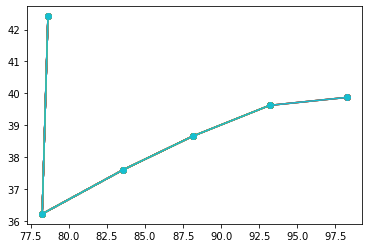

In [9]:
# temp = 0
visited_nbrs = []
path_list = []
# x_co = []
# y_co = []
for node in vertexLayertInstance.verticesOrigin:
    dummy = None
#     print(node.position)
#     x_co.append(node.position[1])
#     y_co.append(node.position[0])
    nbr_queue = []
    path = [node]
    nbr_queue.append(node)
    for i in range(20):
        max_dem = 0
        max_node = None
        new_node = nbr_queue.pop()
#         print(new_node)
#         print(new_node.position, 'or')#, visited_nbrs)
        for nbr in new_node.goesTo:
#             print(nbr)
            nb = nbr[0]
#             print(nb.position, 'nbr')
            if nb and nb.position.tolist() not in visited_nbrs:
                if nb.dem > max_dem:
                    max_dem = nb.dem
                    max_node = nb
                visited_nbrs.append(nb.position.tolist())
                dummy = nb
#             print(visited_nbrs)
#         print(visited_nbrs[-1])
        if max_node is not None:
            nbr_queue.append(max_node)
#             print(max_node)#.position.tolist())
            path.append(max_node)#.position.tolist())
#             print(nbr_queue)
        else:
            nbr_queue.append(new_node)
            break
        path_list.append(path)

    print(nbr_queue)
#     print(dummy.comesFrom)
    for i in range(20):
        max_dem = 0
        max_node = None
        new_node = nbr_queue.pop()
        for nbr in new_node.comesFrom:
            print(nbr)
#             nbr = nb[0]
            if nbr:
                nb = nbr[0]
                print(nb.position)
                if nb.position.tolist() not in visited_nbrs:
    #                 print(nbr)
    #                 print(nb.position)
                    if nb.dem > max_dem:
                        max_dem = nb.dem
                        max_node = nb
                    visited_nbrs.append(nb.position.tolist())
#                     print(visited_nbrs) 
        if max_node is not None:
            nbr_queue.append(max_node)
#             print(max_node)#.position.tolist())
            path.append(max_node)#.position.tolist())
#             print(nbr_queue)
        else:
            print('a')
            break
        path_list.append(path)
    break
# plt.plot(x_co, y_co, marker = "o")
# print(path_list)
fig, ax = plt.subplots(1,1)
# print(path_list)
for path in path_list:
    x_coor = []
    y_coor = []
#     print(path)
    for ver in path:
#         print(ver)
        x_coor.append(ver.position[1])
        y_coor.append(ver.position[0])
#     print(x_coor, y_coor)
#     plt.xlim(20, 80)
#     plt.ylim(20, 80)
        ax.plot(x_coor, y_coor, marker = "o")
# plt.show()
# fig.show()
plt.savefig(IMAGE_OUTPUT_PATH+'paths.png')


0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[78.62817815565771, 78.24712053983444, 70.65515586939995, 71.20658811974172, 72.14133511506554, 69.42341439746794, 68.29326019375942, 67.71619268064103, 74.4615842828581, 69.16925108024896, 69.29161045725785, 68.26571194554835, 68.26571194554835, 65.85694078393854, 63.038369892983624, 59.094160597609836, 63.620053977919085, 55.421433864354434, 56.706473415964204, 55.421433864354434] [42.41608033990441, 36.21657840129321, 38.702679044305484, 33.568046372191645, 29.00747825632419, 34.76127744786419, 39.396321304871506, 44.201719316005246, 46.68104735394201, 46.19500104510995, 43.95565783858389, 48.7476140914628, 48.7476140914628, 54.633477289254046, 58.26821402685702, 55.549405627817045, 55.96714626041277, 54.8479458865362, 49

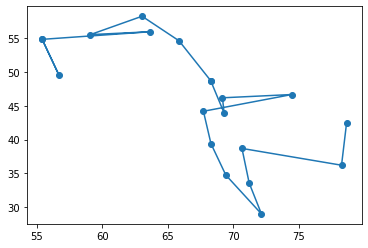

[82.66416963289922, 87.73410251102692, 77.62357238666395, 81.82482366431746, 83.92418352201595, 88.47030789391346, 79.04534595411992, 74.76877327243554, 73.41344084742418, 74.76877327243554, 72.72920980304909] [18.02416004175237, 18.816055729425926, 17.61958191391875, 23.239923844896072, 13.037708487954024, 14.050172554218497, 12.376253321149116, 14.15115343623238, 18.93359846689776, 14.15115343623238, 23.756704444939043]


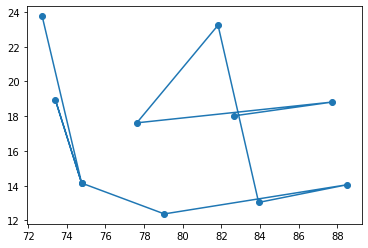

[93.58535031232361, 95.63341978927411, 96.93802391143177, 98.68400055007451, 97.71334796171921, 98.540849965841, 97.76503403574227, 98.7642377785783, 99.13915709533929, 94.18515876249111, 97.83545793340663, 89.29984896208332, 88.03369452226264, 83.54187558927991, 78.5865508247955, 73.29478070211886, 68.23444450288471, 62.32717200008213, 57.847335952935026, 57.42260209595747] [24.21653152694017, 29.014013886316, 33.577421194071654, 38.329053609796645, 40.30255466749468, 45.53199579842872, 48.71301246838973, 43.46894382093166, 38.735235520767496, 45.80602796461824, 42.26216031240186, 49.731743265775826, 54.82582114706767, 53.74175231600336, 52.652047142017715, 51.81290331455211, 51.06009509920311, 48.95684943769442, 48.122586472988566, 47.84032211376472]


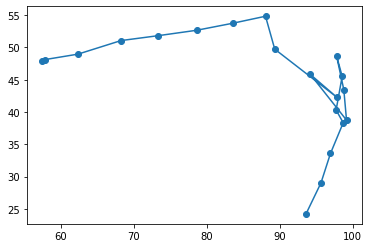

[80.17511187621831, 78.23974222664116, 82.81311351959022, 81.82482366431746, 86.92251569896314, 91.24135496577416, 93.67913341283628, 95.00099898728558, 94.4052576076374, 96.53086608084601, 99.81610422577236, 98.22966954883465, 102.68508641777413, 102.3415287886625, 102.3415287886625, 109.59029570480408, 111.12661519358358, 111.05071199332154, 109.11869353539338, 105.32869893540838] [30.218506175563867, 34.933465239696254, 25.30192225982165, 23.239923844896072, 23.80835462143918, 20.377883264362698, 23.783273243376797, 28.31759577054423, 32.272715860111234, 36.38551235175093, 40.63557076408963, 39.86992376775135, 40.3363149318091, 45.38605810531643, 45.38605810531643, 48.28342410664518, 43.60806044628556, 38.791097211168506, 34.57535747147892, 31.378344550650972]


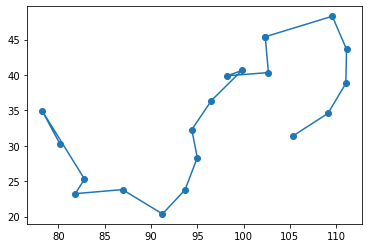

[74.0582988612118, 75.22569831376317, 76.55713649735821, 77.91514289254049, 77.8318715109308, 76.75462488210673, 77.03176361285928, 77.64375629452552, 77.54252528449642, 78.77760858733058] [14.768763005242814, 10.323342582414538, 5.499516685484792, 0.570574247600126, 0.813629466114809, 6.903639082937687, 0.8329730868787254, -4.392906178242849, -4.579728900647134, -4.271894806176088]


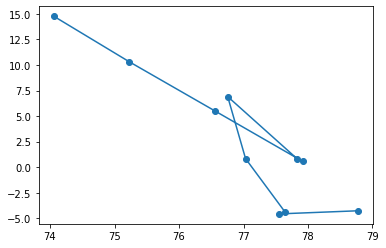

[85.8177633985669, 86.82592530822907, 85.39419142728183] [3.977608627404708, -1.3281557117873983, 8.545000679874795]


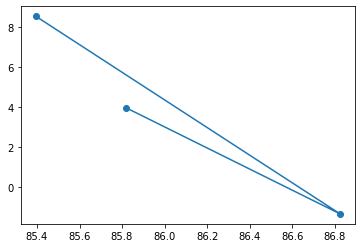

[92.92983873435332, 88.12942539584661, 82.9433441438402, 84.9823858968436, 84.4826622092178, 83.41601995536409, 83.41601995536409, 88.6575119840433, 86.85123798017364, 91.36834388531251, 97.2403839626022, 95.43703233407182, 96.67255929952783, 96.67255929952783, 97.37195282444434, 97.18429220587772, 96.11504561535853, 100.79783505529812, 102.22047244678991, 97.02834772514304] [41.41839087680653, 42.512225740084986, 44.03702950618027, 48.8846984367114, 54.03840929653373, 58.51782238201597, 58.51782238201597, 59.344786158964126, 53.775658864914135, 54.30511796654131, 53.197390669324996, 57.315348067822825, 52.87117342118415, 52.87117342118415, 53.4984870675977, 58.20814770029223, 55.28758318650265, 56.5794759342243, 56.73372445472369, 55.69685515721606]


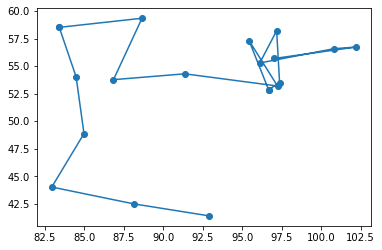

<Figure size 432x288 with 0 Axes>

In [10]:
path_list = []
ctr = 0
visited_nbrs = []
for node in vertexLayertInstance.verticesOrigin:
    if node not in visited_nbrs:
        visited_nbrs.append(node)
        nbrs = []
        path = [node]
        nbrs.append(node)
        path_stops = 0
#         while path_stops <= 5 and len(path) <= 50:
        for i in range(19):
    #         max_dem = 0
            sorted_dem = []
            new_node = visited_nbrs[-1]
            if new_node.goesTo:
                nbrs = [i[0] for i in new_node.goesTo]
    #         print(nbrs)
            if any(new_node.comesFrom):
                nbrs.extend([i[0] for i in new_node.comesFrom])
    #         print(nbrs)
    #         max_dem = max([ver.dem for ver in nbr_queue])
            sorted_dem = sorted(nbrs, key=lambda y: y.dem)   
    #         print(sorted_dem)
            ind = len(sorted_dem)-1
            added = False
            while not added and ind >= 0:
                if sorted_dem[ind] not in visited_nbrs:
                    path.append(sorted_dem[ind])
                    if sorted_dem[ind] in vertexLayertInstance.verticesOrigin:
                        path_stops += 1
                    visited_nbrs.append(sorted_dem[ind])
                    added = True
                else:
                    ind -=1
    #         print(len(visited_nbrs))

            print(path_stops)
        path_list.append(path)
        if ctr > 5:
            break
        else:
            ctr += 1

for path in path_list:
    x_coor = []
    y_coor = []
#     print(path)
    for ver in path:
#         print(ver)
        x_coor.append(ver.position[1])
        y_coor.append(ver.position[0])
    print(x_coor, y_coor)
#     plt.xlim(20, 80)
#     plt.ylim(20, 80)
    plt.plot(x_coor, y_coor, marker = "o")
    plt.show()
# fig.show()
plt.savefig(IMAGE_OUTPUT_PATH+'paths1.png')

In [45]:
path_list= []
# temp = random.sample(points, 8)
temp = random.sample(points, 16)
random.shuffle(temp)
starts = temp[:len(temp)//2]
ends = temp[len(temp)//2:]
# for s in starts:

# plt.show()

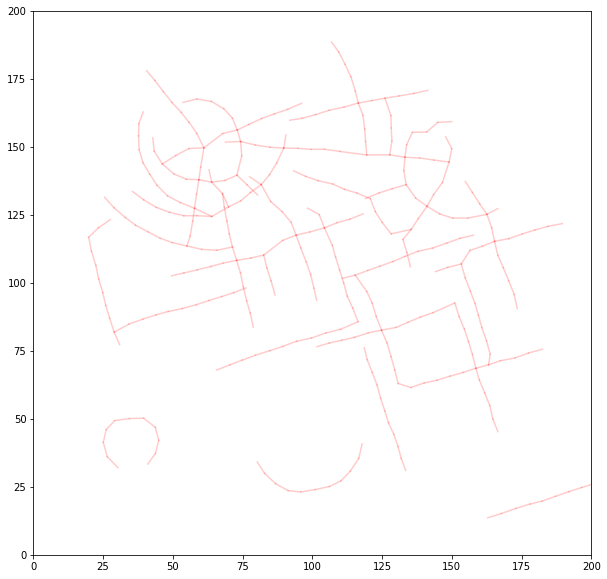

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import cv2
import math
import random
import bisect
import copy
from scipy.spatial import Voronoi, voronoi_plot_2d
from itertools import accumulate

from randomScatter import RandomScatter
from direction import Direction
from vertex import VertexBase, VertexOrigin, VertexLayer


if __name__ =="__main__":

    ERROR_MESSAGE = '----------------------'
    IMAGE_INPUT_PATH = './image_input/scatter_rate.jpg'
    IMAGE_OUTPUT_PATH = './image_output/'
    ROADMAP_RECTANGLE = ['./image_input/roadMapRectangle_00.jpg']
    ROADMAP_CIRCLE = ['./image_input/roadMapCircle_00.jpg',
                        './image_input/roadMapCircle_01.jpg',
                        './image_input/roadMapCircle_02.jpg',
                        './image_input/roadMapCircle_03.jpg']

    if not os.path.exists(IMAGE_OUTPUT_PATH):
        os.mkdir(IMAGE_OUTPUT_PATH)

    randomScatterInstance = RandomScatter(IMAGE_INPUT_PATH, 50, 0, reverse=True, squared=True)
    randomScatterInstance.readImage()
    randomScatterInstance.randomDots()
    randomScatterInstance.makePoints()

    #run improvePoints twice to refine points' locations
    randomScatterInstance.improvePoints(randomScatterInstance.points)
    _, graph, points = randomScatterInstance.improvePoints(randomScatterInstance.improvedPoints) * 1
#     print(points)
    directionInstance = Direction(ROADMAP_RECTANGLE, ROADMAP_CIRCLE)

    vertexLayertInstance = VertexLayer(randomScatterInstance, directionInstance)
    
#     plt.ion()
#     plt.ioff()
#     plt.show()
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xlim(left=0, right=randomScatterInstance.shape[1])
    ax.set_ylim(top=200, bottom=0)#randomScatterInstance.shape[0])
    plt.figure(1,figsize=(10,10)) 
    
    for i in range(5):
        vertexLayertInstance.getNextVertices()
        vertexLayertInstance.mergeNextVertices(5)
        vertexLayertInstance.mergeToAll(3)
        if len(vertexLayertInstance.verticesNext)<=3:
#             vertexLayertInstance.changeNextVertices()
            break
        vertexLayertInstance.plotLines(vertexLayertInstance.verticesNext, True)
        vertexLayertInstance.changeNextVertices()
        
    vertexLayertInstance.changeNextVertices()
    

    vertexlist={}
    c=0
    
    for i in vertexLayertInstance.verticesAll:
    #     if str(i.position) not in vertexlist:
        vertexlist[str(i.position)]=c
        c+=1

#     adjlist={}
    adjdict={}
    # dod = {0: {1: {"weight": 1}}}  # single edge (0,1)

    for i in vertexLayertInstance.verticesAll:
        for j in i.comesFrom:
            if str(i.position) not in vertexlist:
                vertexlist[str(i.position)] = c
                c+=1
            
            if str(j[0].position) in vertexlist:
                if vertexlist[str(j[0].position)] in adjdict:
                    adjdict[vertexlist[str(j[0].position)]].update({vertexlist[str(i.position)]:{'weight':j[0].getDistance(i)}})
                else:
                    adjdict[vertexlist[str(j[0].position)]] = {vertexlist[str(i.position)]:{'weight':j[0].getDistance(i)}}
            else:
                vertexlist[str(j[0].position)]=c
                c+=1
                if vertexlist[str(j[0].position)] in adjdict:
                    adjdict[vertexlist[str(j[0].position)]].update({vertexlist[str(i.position)]:{'weight':j[0].getDistance(i)}})
                else:
                    adjdict[vertexlist[str(j[0].position)]] = {vertexlist[str(i.position)]:{'weight':j[0].getDistance(i)}}

        for j in i.goesTo:
            if str(j[0].position) not in vertexlist:
                vertexlist[str(j[0].position)] = c
                c+=1
                
            if str(i.position) in vertexlist:
                if vertexlist[str(i.position)] in adjdict:
                    adjdict[vertexlist[str(i.position)]].update({vertexlist[str(j[0].position)]:{'weight':i.getDistance(j[0])}})
                else:
                    adjdict[vertexlist[str(i.position)]] = {vertexlist[str(j[0].position)]:{'weight':i.getDistance(j[0])}}
            else:
                vertexlist[str(i.position)] = c
                c+=1
                if vertexlist[str(i.position)] in adjdict:
                    adjdict[vertexlist[str(i.position)]].update({vertexlist[str(j[0].position)]:{'weight':i.getDistance(j[0])}})
                else:
                    adjdict[vertexlist[str(i.position)]] = {vertexlist[str(j[0].position)]:{'weight':i.getDistance(j[0])}}
    # print(adjdict)
    vertexlistinv = {v: k for k, v in vertexlist.items()}

    vertexpos={}
    # print(vertexlistinv)
    for k,v in vertexlistinv.items():
        pos=[float(x) for x in v.replace("[",'').replace("]",'').split()]
    #     print(pos.reverse())
        vertexpos[k] = pos[::-1]
    # vertexpos={k:ast.literal_eval(v) for (k,v) in vertexlistinv}
    # vertexpos
    G = nx.Graph(adjdict)
    # G.nodes()
    G.remove_edges_from(nx.selfloop_edges(G))
#     nx.draw(G, vertexpos,node_size=10,font_size=8)
    plt.show()

#     pos = nx.get_node_attributes(graph, 'pos')
#     nx.draw_networkx_nodes(graph, pos=pos, node_size=6, node_color='k')
#     nx.draw_networkx_edges(graph, pos=pos, width=2)

#     print(vertexLayertInstance.verticesAll)   # What do the coordinates mean?

    # vertexLayertInstance.plotLines(vertexLayertInstance.verticesAll+vertexLayertInstance.verticesOrigin)
#     vertexLayertInstance.plotVertices(points)

#     x_coor = []
#     y_coor = []
#     for ver in points:
#         x_coor.append(ver[0])
#         y_coor.append(ver[1])
#     plt.scatter(x_coor, y_coor)
#     plt.savefig(IMAGE_OUTPUT_PATH+'output_1.png')
#     plt.show()


In [84]:
graph={}
for vert in vertexLayertInstance.verticesAll:
    print(vert.position)
    for nbr in vert.comesFrom:
        print(nbr[0].position,nbr[0].getDistance(vert))
    for nbr in vert.goesTo:
        print(nbr[0].position,nbr[0].getDistance(vert))
    break

[165.89991852 140.46551588]
[166.92289086 145.12271616] 4.768226805051947
[165.33549513 135.06778134] 5.427164259835091


In [79]:
# dod = {0: {1: {"weight": 1}}}  # single edge (0,1)
# temp = []
import networkx as nx


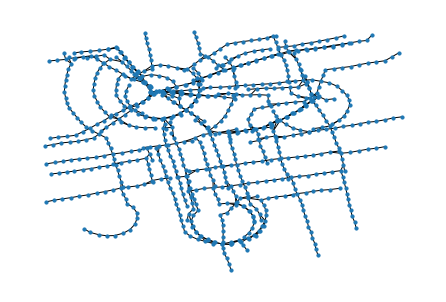

In [80]:

# print(G.number_of_nodes(),G.number_of_edges())

In [72]:
# nx.draw(G, vertexpos,node_size=10,font_size=8)

In [53]:
# G.nodes

NodeView(())

No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018708E9F0D0>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018702021820>, -0.0] aaaaaaaaaaaa
No vertex was added!
[<vertex.VertexDescendant object at 0x00000187066180D0>, -0.0] aaaaaaaaaaaa
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x0000018704646820>, -0.0] aaaaaaaaaaaa


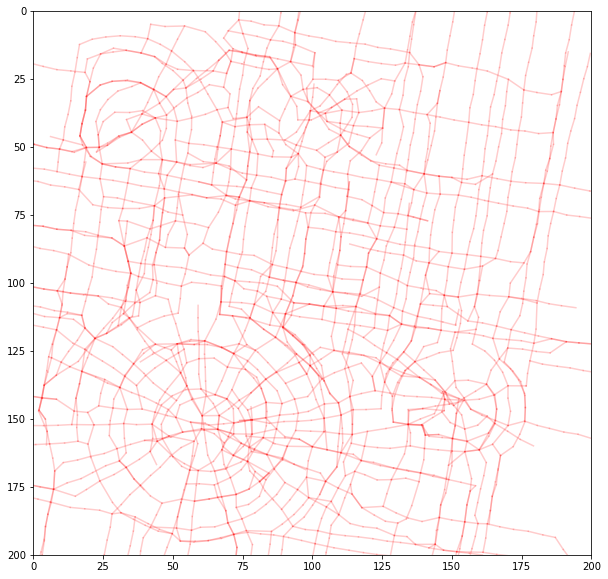

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
import random
import bisect
import copy
from scipy.spatial import Voronoi, voronoi_plot_2d
from itertools import accumulate

from randomScatter import RandomScatter
from direction import Direction
from vertex import VertexBase, VertexOrigin, VertexLayer


if __name__ =="__main__":

    ERROR_MESSAGE = '----------------------'
    IMAGE_INPUT_PATH = './image_input/scatter_rate.jpg'
    IMAGE_OUTPUT_PATH = './image_output/'
    ROADMAP_RECTANGLE = ['./image_input/roadMapRectangle_00.jpg']
    ROADMAP_CIRCLE = ['./image_input/roadMapCircle_00.jpg',
                        './image_input/roadMapCircle_01.jpg',
                        './image_input/roadMapCircle_02.jpg',
                        './image_input/roadMapCircle_03.jpg']

    if not os.path.exists(IMAGE_OUTPUT_PATH):
        os.mkdir(IMAGE_OUTPUT_PATH)

    randomScatterInstance = RandomScatter(IMAGE_INPUT_PATH, 200, 0, reverse=True, squared=True)
    randomScatterInstance.readImage()
    randomScatterInstance.randomDots()
    randomScatterInstance.makePoints()

    #run improvePoints twice to refine points' locations
    randomScatterInstance.improvePoints(randomScatterInstance.points)
    randomScatterInstance.improvePoints(randomScatterInstance.improvedPoints) * 1

    directionInstance = Direction(ROADMAP_RECTANGLE, ROADMAP_CIRCLE)

    vertexLayertInstance = VertexLayer(randomScatterInstance, directionInstance)
    
    plt.ion()
    plt.ioff()
    plt.show()
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xlim(left=0, right=randomScatterInstance.shape[1])
    ax.set_ylim(top=0, bottom=randomScatterInstance.shape[0])

    
    for i in range(20):
        vertexLayertInstance.getNextVertices()
        vertexLayertInstance.mergeNextVertices(5)
        vertexLayertInstance.mergeToAll(3)
        vertexLayertInstance.plotLines(vertexLayertInstance.verticesNext, True)
        if len(vertexLayertInstance.verticesNext)<=3:
            break
        vertexLayertInstance.changeNextVertices()

#     print(vertexLayertInstance.verticesAll)   # What do the coordinates mean?

    # vertexLayertInstance.plotLines(vertexLayertInstance.verticesAll+vertexLayertInstance.verticesOrigin)
    # vertexLayertInstance.plotVertices(vertexLayertInstance.verticesOrigin)

    plt.savefig(IMAGE_OUTPUT_PATH+'output.png')
    plt.show()

No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x000001870616E7C0>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018702203370>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018702203370>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x000001870647A700>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x0000018701E00130>, -0.0] aaaaaaaaaaaa
No vertex was added!
No vertex was added!
[<vertex.VertexDescendant object at 0x000001870647ADC0>, -0.0] aaaaaaaaaaaa
[<vertex.VertexDescendant object at 0x00000187021D0FD0>, -0.0] aaaaaaaaaaaa


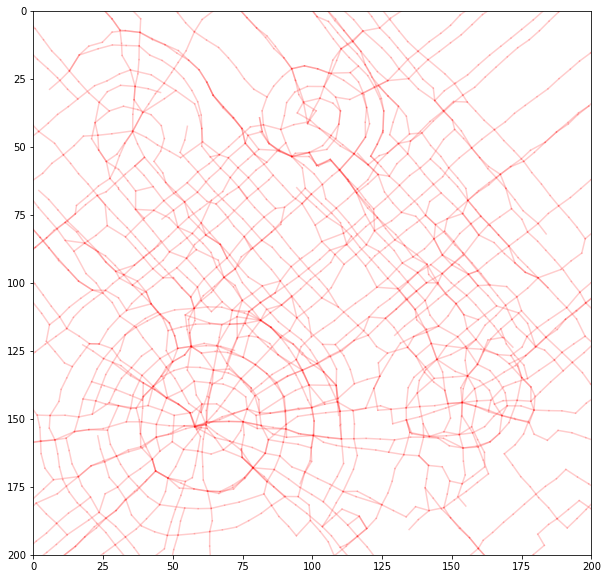

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import math
import random
import bisect
import copy
from scipy.spatial import Voronoi, voronoi_plot_2d
from itertools import accumulate

from randomScatter import RandomScatter
from direction import Direction
from vertex import VertexBase, VertexOrigin, VertexLayer


if __name__ =="__main__":

    ERROR_MESSAGE = '----------------------'
    IMAGE_INPUT_PATH = './image_input/scatter_rate.jpg'
    IMAGE_OUTPUT_PATH = './image_output/'
    ROADMAP_RECTANGLE = ['./image_input/roadMapRectangle_00.jpg']
    ROADMAP_CIRCLE = ['./image_input/roadMapCircle_00.jpg',
                        './image_input/roadMapCircle_01.jpg',
                        './image_input/roadMapCircle_02.jpg',
                        './image_input/roadMapCircle_03.jpg']

    if not os.path.exists(IMAGE_OUTPUT_PATH):
        os.mkdir(IMAGE_OUTPUT_PATH)

    randomScatterInstance = RandomScatter(IMAGE_INPUT_PATH, 200, 0, reverse=True, squared=True)
    randomScatterInstance.readImage()
    randomScatterInstance.randomDots()
    randomScatterInstance.makePoints()

    #run improvePoints twice to refine points' locations
    randomScatterInstance.improvePoints(randomScatterInstance.points)
    randomScatterInstance.improvePoints(randomScatterInstance.improvedPoints) * 1

    directionInstance = Direction(ROADMAP_RECTANGLE, ROADMAP_CIRCLE)

    vertexLayertInstance = VertexLayer(randomScatterInstance, directionInstance)
    
    plt.ion()
    plt.ioff()
    plt.show()
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xlim(left=0, right=randomScatterInstance.shape[1])
    ax.set_ylim(top=0, bottom=randomScatterInstance.shape[0])

    
    for i in range(20):
        vertexLayertInstance.getNextVertices()
        vertexLayertInstance.mergeNextVertices(5)
        vertexLayertInstance.mergeToAll(3)
        vertexLayertInstance.plotLines(vertexLayertInstance.verticesNext, True)
        if len(vertexLayertInstance.verticesNext)<=3:
            break
        vertexLayertInstance.changeNextVertices()

#     print(vertexLayertInstance.verticesAll)   # What do the coordinates mean?

    # vertexLayertInstance.plotLines(vertexLayertInstance.verticesAll+vertexLayertInstance.verticesOrigin)
    # vertexLayertInstance.plotVertices(vertexLayertInstance.verticesOrigin)

    plt.savefig(IMAGE_OUTPUT_PATH+'output.png')
    plt.show()
